In [1]:
# Pandas library for the pandas dataframes
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import scipy



# Import Scikit-Learn library for decision tree models
import sklearn 

from sklearn import datasets, linear_model, metrics, tree
from sklearn.utils import resample

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import ElasticNet, Lasso,  RidgeCV

from sklearn.neighbors import KNeighborsRegressor

        
# Dataset splitting        
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV

# Errors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

from matplotlib import pyplot as plt

from tqdm import tqdm

import os
import joblib



In [2]:
df_emi = pd.read_csv("dataset_scaled_emission.csv")
df_emi

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,other_1_amount_mmol,other_2_amount_mmol,...,x5_zinc undecylenate,x6_None,x6_copper bromide,x6_oleic acid,x6_trioctylphosphine,x6_water,x6_zinc iodide,diameter_nm,abs_nm,emission_nm
0,0,0,0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,0.865472,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,480.0,539
1,2,2,2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,0.457150,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,560.0,595
2,3,3,3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,0.457150,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,590.0,635
3,4,4,4,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,0.865472,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,429.5,500
4,5,5,5,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,0.865472,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,429.5,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,204,204,204,2.633061,0.718486,5.134675,0.497332,-0.370637,-0.675365,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.4,530.0,579
81,208,208,208,-0.258506,-0.376025,0.137383,1.461446,1.097051,1.635891,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.5,562.0,618
82,211,211,211,-0.093273,-0.485476,0.368027,2.081234,-0.370637,-0.675365,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.7,532.0,591
83,214,214,214,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.675365,-0.156742,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,585.0,630


In [3]:
# Input for ML models


input_col =  ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 
       'x5_None', 'x5_acetic acid', 'x5_superhydride',
       'x5_tetrabutylammonium myristate', 'x5_zinc acetate', 'x5_zinc bromide',
       'x5_zinc chloride', 'x5_zinc iodide', 'x5_zinc octanoate',
       'x5_zinc oleate', 'x5_zinc stearate', 'x5_zinc undecylenate', 'x6_None',
       'x6_copper bromide', 'x6_oleic acid','x6_trioctylphosphine',  'x6_water', 'x6_zinc iodide',
        'abs_nm']

output_col = ['emission_nm']

X = df_emi[input_col]

Y = df_emi[output_col]

In [4]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [6]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 60, 2):
            
            B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr.fit(X_train, np.ravel(Y_train))
            
            B_Y_pred = B_regr.predict(X_test)
            
            mae = mean_absolute_error(Y_test, B_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [12:09<00:00, 25.14s/it]

17.021234107772575 5 6 48


### 2. Decision Trees

In [6]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)

            DT_Y_pred = DT_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:13<00:00,  4.59s/it]

15.512820512820518 12 14 8


In [ ]:
DT_regr = DecisionTreeRegressor(max_depth=5,
                                max_features=9,
                                random_state=60)
            
DT_regr.fit(X_train, np.ravel(Y_train))
            
DT_Y_pred = B_regr.predict(X_test)
            
DT_mae = mean_absolute_error(Y_test, DT_Y_pred)
DT_mse = mean_squared_error(Y_test, DT_Y_pred)
print("Mean absolute error =", round(DT_mae,3), '\n' "Mean squared error =", round(DT_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, DT_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(DT_mae,3) , fontdict=None)
plt.show()

### 3. Random Forrest

In [7]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 60, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = RF_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [08:52<00:00, 18.36s/it]

14.346153846153847 9 2 52


In [15]:
RF_regr = RandomForestRegressor(max_depth=6, n_estimators=1, max_features=20, random_state=45)
RF_regr.fit(X_train, np.ravel(Y_train))
RF_Y_pred = RF_regr.predict(X_test)
mae = mean_absolute_error(Y_test, RF_Y_pred)
print(mae)

14.02307692307692


In [9]:
min_mae = 9999
min_a = 0
for a in tqdm(range(1,100)):
    RF_regr = RandomForestRegressor(max_depth=11, n_estimators=3, max_features=30, random_state=a)
    RF_regr.fit(X_train, np.ravel(Y_train))
    RF_Y_pred = RF_regr.predict(X_test)
    mae = mean_absolute_error(Y_test, RF_Y_pred)
    if (min_mae > mae):
        min_mae = mae
        min_a = a
print(min_mae, min_a)    

100%|██████████| 99/99 [00:00<00:00, 110.61it/s]

14.794871794871794 45


### 4. Extra Trees

In [8]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 34)):
    for j in range(1, 34):
        for k in range(2, 60, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = ET_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 33/33 [20:24<00:00, 37.11s/it]

10.897435897435894 3 29 37


Mean absolute error = 11.0 
Mean squared error = 167.654


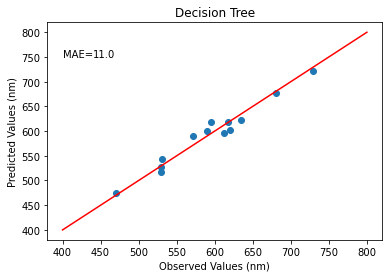

In [11]:
ET_regr = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=26,
                                            random_state=46)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
ET_mae = mean_absolute_error(Y_test, ET_Y_pred)
ET_mse = mean_squared_error(Y_test, ET_Y_pred)
print("Mean absolute error =", round(ET_mae,3), '\n' "Mean squared error =", round(ET_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, ET_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(ET_mae,3) , fontdict=None)
plt.show()

### 5. Gradient Boosting

In [9]:
min_mae = 999
min_i, min_j, min_k, min_l = 0, 0, 0.0, 0
for i in tqdm(range(320, 400, 10)):
    for j in range(2, 24, 2):
        for k in np.arange(0.08, 0.22, 0.02):
            for l in range(2, 18, 4):
                GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j, learning_rate=k, random_state=l)
                GB_regr.fit(X_train, np.ravel(Y_train))
                GB_Y_pred = GB_regr.predict(X_test)

                mae = mean_absolute_error(Y_test, GB_Y_pred)
                if (min_mae > mae):
                    min_mae = mae
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l

print(min_mae, min_i, min_j, min_k, min_l)

100%|██████████| 8/8 [09:33<00:00, 71.70s/it]

16.897984567641167 320 2 0.2 14


In [ ]:
GB_regr = GradientBoostingRegressor(n_estimators=540, max_depth=4, learning_rate=0.18, random_state=67)

            
GB_regr.fit(X_train, np.ravel(Y_train))
            
GB_Y_pred = GB_regr.predict(X_test)
            
GB_mae = mean_absolute_error(Y_test, GB_Y_pred)
print("Mean absolute error =", round(GB_mae,3))

plt.figure()
plt.title("Gradient Boosting")
plt.plot(Y_test, GB_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(GB_mae,3) , fontdict=None)
plt.show()

### 6. Others

In [10]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mean absolute error is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(' MAE for diameter is ', mae, '\n')

K-nn
 MAE for diameter is  16.184615384615373 

Ridge
 MAE for diameter is  18.110791212932252 

Lasso
 MAE for diameter is  19.560952909058933 

ElasticNet
 MAE for diameter is  18.19936624046899 



## Conclusion

Decision Tree gave the best performance.

### Saving model

In [7]:
ET_regr = ExtraTreesRegressor(n_estimators=3, 
                                            max_features=29,
                                            random_state=37)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
joblib.dump(ET_regr, "./model_aug_emission_ExtraTrees.joblib")


['./model_aug_emission_ExtraTrees.joblib']